## Adult_Income_Project

In [90]:
import numpy as np
import pandas as pd

In [3]:
#Get training data
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [4]:
#Get test data
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [5]:
df = train_set.append(test_set)

In [6]:
#Display first 5 rows of dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
#Columns Names
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'income']

In [8]:
#Set columns for data frame
df.columns = col_labels

In [9]:
#Display first 5 rows of training dataframe
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.income.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [11]:
df.income = df.income.map({' <=50K':0, ' >50K':1, ' <=50K.':0, ' >50K.':1}).astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
income            48842 non-null int32
dtypes: int32(1), int64(6), object(8)
memory usage: 5.8+ MB


In [13]:
df.shape

(48842, 15)

In [14]:
df.replace(' ?', np.nan).dropna().shape

(45222, 15)

In [15]:
df = df.replace(' ?', np.nan).dropna()

In [16]:
df.shape

(45222, 15)

In [17]:
final_df = pd.get_dummies(df)
final_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X = final_df.drop('income', axis=1)

In [19]:
y = final_df.income

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

### Models

In [21]:
performance = []

In [77]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [84]:
def Algo_Data(prediction):
    print('-'*40)
    print('Confusion Matrix')
    print(confusion_matrix(y_test,prediction))
    print('-'*40)
    print('Classification Report')
    print(classification_report(y_test,prediction))
    print('-'*40)
    print('AUC ROC')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediction)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

----------------------------------------
Confusion Matrix
[[9827  359]
 [2439  942]]
----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.96      0.88     10186
           1       0.72      0.28      0.40      3381

   micro avg       0.79      0.79      0.79     13567
   macro avg       0.76      0.62      0.64     13567
weighted avg       0.78      0.79      0.76     13567

----------------------------------------
AUC ROC


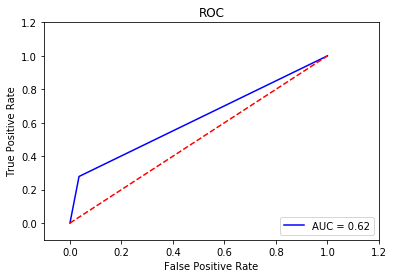

LogisticRegression : Training score - 0.790870320644448 - Test score - 0.7937642809758974


In [86]:
train_score = lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)
prediction = lr.predict(X_test)
Algo_Data(prediction)

print(f'LogisticRegression : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'LogisticRegression', 'training_score':train_score, 'testing_score':test_score})

#### Gaussian Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

----------------------------------------
Confusion Matrix
[[9641  545]
 [2306 1075]]
----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     10186
           1       0.66      0.32      0.43      3381

   micro avg       0.79      0.79      0.79     13567
   macro avg       0.74      0.63      0.65     13567
weighted avg       0.77      0.79      0.76     13567

----------------------------------------
AUC ROC


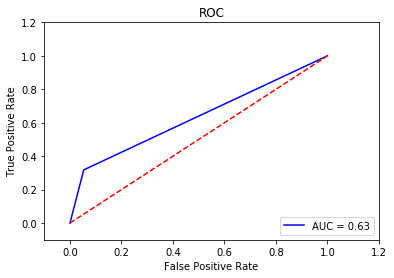

Gaussian Naive Bayes : Training score - 0.7883114831780129 - Test score - 0.7898577430529963


In [87]:
GNB.fit(X_train,y_train)
train_score = GNB.score(X_train,y_train)
test_score = GNB.score(X_test,y_test)
prediction = GNB.predict(X_test)
Algo_Data(prediction)

print(f'Gaussian Naive Bayes : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'Gaussian Naive Bayes', 'training_score':train_score, 'testing_score':test_score})

#### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [29]:
knn_scores = []

KNN 1 : Training score - 0.9999368188279892 -- Test score - 0.7297118006928577
KNN 3 : Training score - 0.8620439109145475 -- Test score - 0.7569838578904695
KNN 5 : Training score - 0.8296003790870321 -- Test score - 0.7723151765312891
KNN 7 : Training score - 0.8155109777286369 -- Test score - 0.7804230854278764
KNN 9 : Training score - 0.8089401358395198 -- Test score - 0.7860249133927913
KNN 11 : Training score - 0.8053388090349076 -- Test score - 0.7897840347903
KNN 13 : Training score - 0.8023692939504028 -- Test score - 0.7905211174172625
KNN 15 : Training score - 0.800252724688043 -- Test score - 0.7925849487727574
KNN 17 : Training score - 0.7996525035539409 -- Test score - 0.7942065305520749
KNN 19 : Training score - 0.7990206918338335 -- Test score - 0.7945750718655561


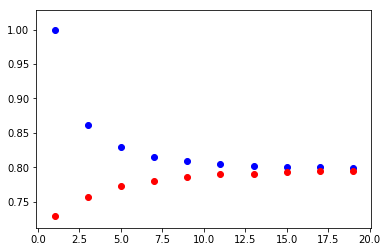

In [30]:
train_scores = []
test_scores = []

for n in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'KNN {n} : Training score - {train_score} -- Test score - {test_score}')
    knn_scores.append({'algorithm':'KNN', 'training_score':train_score})
    
plt.scatter(x=range(1, 20, 2),y=train_scores,c='b')
plt.scatter(x=range(1, 20, 2),y=test_scores,c='r')

plt.show()

----------------------------------------
Confusion Matrix
[[9311  875]
 [2214 1167]]
----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     10186
           1       0.57      0.35      0.43      3381

   micro avg       0.77      0.77      0.77     13567
   macro avg       0.69      0.63      0.64     13567
weighted avg       0.75      0.77      0.75     13567

----------------------------------------
AUC ROC


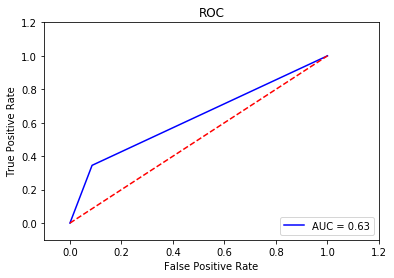

K Neighbors : Training score - 0.8296003790870321 - Test score - 0.7723151765312891


In [88]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

knn.score(X_train,y_train)

train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)

prediction = knn.predict(X_test)
Algo_Data(prediction)

print(f'K Neighbors : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'K Neighbors', 'training_score':train_score, 'testing_score':test_score})

#### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

----------------------------------------
Confusion Matrix
[[8889 1297]
 [1216 2165]]
----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     10186
           1       0.63      0.64      0.63      3381

   micro avg       0.81      0.81      0.81     13567
   macro avg       0.75      0.76      0.75     13567
weighted avg       0.82      0.81      0.82     13567

----------------------------------------
AUC ROC


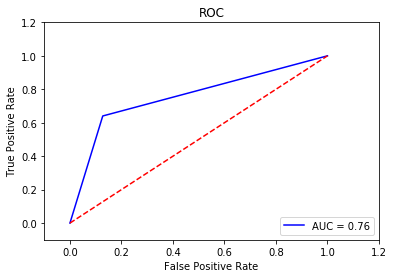

Decision Tree : Training score - 0.9999368188279892 - Test score - 0.8147711358443281


In [89]:
train_score = dt.score(X_train,y_train)
test_score = dt.score(X_test,y_test)

prediction = dt.predict(X_test)
Algo_Data(prediction)

print(f'Decision Tree : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'Decision Tree', 'training_score':train_score, 'testing_score':test_score})

#### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
train_score = rf.score(X_train,y_train)
test_score = rf.score(X_test,y_test)

prediction = rf.predict(X_test)
Algo_Data(prediction)

print(f'Random Forest : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'Random Forest', 'training_score':train_score, 'testing_score':test_score})

Random Forest : Training score - 0.9879639867319538 - Test score - 0.8397582368983563 - Confusion Matrix - [[9388  798]
 [1376 2005]] - Classification Report -               precision    recall  f1-score   support

           0       0.87      0.92      0.90     10186
           1       0.72      0.59      0.65      3381

   micro avg       0.84      0.84      0.84     13567
   macro avg       0.79      0.76      0.77     13567
weighted avg       0.83      0.84      0.83     13567



#### Support Vector Machine

In [39]:
from sklearn import svm

svc = svm.SVC(kernel='linear')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [41]:
svc.fit(x_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [69]:
train_score = svc.score(X_train,y_train)
test_score = svc.score(X_test,y_test)

prediction = svc.predict(X_test)
Algo_Data(prediction)

print(f'SVM : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'SVM', 'training_score':train_score, 'testing_score':test_score})

SVM : Training score - 0.24725951666403412 - Test score - 0.24920763617601532 - Confusion Matrix - [[    0 10186]
 [    0  3381]] - Classification Report -               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10186
           1       0.25      1.00      0.40      3381

   micro avg       0.25      0.25      0.25     13567
   macro avg       0.12      0.50      0.20     13567
weighted avg       0.06      0.25      0.10     13567



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### XG Boost

In [43]:
from xgboost.sklearn import XGBClassifier

In [44]:
xg = XGBClassifier()
xg.fit(X_train,y_train,  eval_set = [(X_train,y_train),(X_test, y_test)], early_stopping_rounds=20)

[0]	validation_0-error:0.159027	validation_1-error:0.164885
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.158901	validation_1-error:0.163411
[2]	validation_0-error:0.158901	validation_1-error:0.163411
[3]	validation_0-error:0.158901	validation_1-error:0.163411
[4]	validation_0-error:0.15909	validation_1-error:0.164885
[5]	validation_0-error:0.157669	validation_1-error:0.163706
[6]	validation_0-error:0.157669	validation_1-error:0.163706
[7]	validation_0-error:0.157669	validation_1-error:0.163706
[8]	validation_0-error:0.157574	validation_1-error:0.16319
[9]	validation_0-error:0.158427	validation_1-error:0.162822
[10]	validation_0-error:0.157542	validation_1-error:0.163043
[11]	validation_0-error:0.15552	validation_1-error:0.159726
[12]	validation_0-error:0.155584	validation_1-error:0.159726
[13]	validation_0-error:0.155426	validation_1-error:0.15972

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [70]:
train_score = xg.score(X_train,y_train)
test_score = xg.score(X_test,y_test)

prediction = xg.predict(X_test)
Algo_Data(prediction)

print(f'XGBoost : Training score - {train_score} - Test score - {test_score}')

performance.append({'algorithm':'XGBoost', 'training_score':train_score, 'testing_score':test_score})

XGBoost : Training score - 0.8641920707629126 - Test score - 0.8602491339279134 - Confusion Matrix - [[9613  573]
 [1323 2058]] - Classification Report -               precision    recall  f1-score   support

           0       0.88      0.94      0.91     10186
           1       0.78      0.61      0.68      3381

   micro avg       0.86      0.86      0.86     13567
   macro avg       0.83      0.78      0.80     13567
weighted avg       0.85      0.86      0.85     13567



### Final Conclusion

In [71]:
performance

[{'algorithm': 'LogisticRegression',
  'training_score': 0.790870320644448,
  'testing_score': 0.7937642809758974},
 {'algorithm': 'Gaussian Naive Bayes',
  'training_score': 0.7883114831780129,
  'testing_score': 0.7898577430529963},
 {'algorithm': 'K Neighbors [5]',
  'training_score': 0.8296003790870321,
  'testing_score': 0.7723151765312891},
 {'algorithm': 'Decision Tree',
  'training_score': 0.9999368188279892,
  'testing_score': 0.8147711358443281},
 {'algorithm': 'Random Forest',
  'training_score': 0.9879639867319538,
  'testing_score': 0.8397582368983563},
 {'algorithm': 'SVM',
  'training_score': 0.24725951666403412,
  'testing_score': 0.24920763617601532},
 {'algorithm': 'XGBoost',
  'training_score': 0.8641920707629126,
  'testing_score': 0.8602491339279134},
 {'algorithm': 'LogisticRegression',
  'training_score': 0.790870320644448,
  'testing_score': 0.7937642809758974},
 {'algorithm': 'LogisticRegression',
  'training_score': 0.790870320644448,
  'testing_score': 0.7937

{'algorithm': 'LogisticRegression', 'training_score': 0.790870320644448, 'testing_score': 0.7937642809758974}
{'algorithm': 'Gaussian Naive Bayes', 'training_score': 0.7883114831780129, 'testing_score': 0.7898577430529963}
{'algorithm': 'K Neighbors [5]', 'training_score': 0.8296003790870321, 'testing_score': 0.7723151765312891}
{'algorithm': 'Decision Tree', 'training_score': 0.9999368188279892, 'testing_score': 0.8147711358443281}
{'algorithm': 'Random Forest', 'training_score': 0.9879639867319538, 'testing_score': 0.8397582368983563}
{'algorithm': 'SVM', 'training_score': 0.24725951666403412, 'testing_score': 0.24920763617601532}
{'algorithm': 'XGBoost', 'training_score': 0.8641920707629126, 'testing_score': 0.8602491339279134}
{'algorithm': 'LogisticRegression', 'training_score': 0.790870320644448, 'testing_score': 0.7937642809758974}
{'algorithm': 'LogisticRegression', 'training_score': 0.790870320644448, 'testing_score': 0.7937642809758974, 'confusion_matrix': array([[9827,  359]

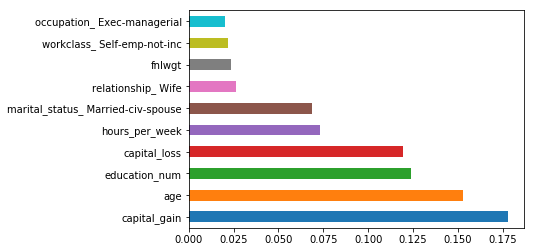

In [50]:
feat_importances = pd.Series(xg.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

##### XGBoost provided the best traing and test score.

##### So XGBoost is the best algorithm for this dataset.